#  Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

# Тариф «Смарт»
Ежемесячная плата: 550 рублей;

Включено:

- 500 минут разговора,

- 50 сообщений 

- 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля

- сообщение: 3 рубля

- 1 Гб интернет-трафика: 200 рублей


# Тариф «Ультра»

Ежемесячная плата: 1950 рублей;

Включено:

- 3000 минут разговора

- 1000 сообщений 

- 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль

- сообщение: 1 рубль

- 1 Гб интернет-трафика: 150 рублей

### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя

- first_name — имя пользователя

- last_name — фамилия пользователя

- age — возраст пользователя (годы)

- reg_date — дата подключения тарифа (день, месяц, год)

- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

- city — город проживания пользователя

- tarif — название тарифного плана

### Таблица calls (информация о звонках):

- id — уникальный номер звонка

- call_date — дата звонка

- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения

- message_date — дата сообщения

- user_id — идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии

- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

- session_date — дата интернет-сессии

- user_id — идентификатор пользователя

### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа

- rub_monthly_fee — ежемесячная абонентская плата в рублях

- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

- messages_included — количество сообщений в месяц, включённых в абонентскую плату

- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

- rub_per_message — стоимость отправки сообщения сверх тарифного пакета

- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## Откроем файл с данными и изучим общую информацию

### Изучим файл datasets/calls.csv

In [66]:
data_calls=pd.read_csv('/datasets/calls.csv')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [67]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [68]:
#id — уникальный номер звонка
#call_date — дата звонка
#duration — длительность звонка в минутах
#user_id — идентификатор пользователя, сделавшего звонок

In [69]:
data_calls.duplicated().sum()

0

**Вывод**: Таблица сделанных звонков. Пропусков нет. Дубликатов  нет. Все хорошо.

### Изучим файл datasets/internet.csv

In [70]:
data_internet=pd.read_csv('/datasets/internet.csv')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [71]:
data_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [72]:
#id — уникальный номер сессии
#mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
#session_date — дата интернет-сессии
#user_id — идентификатор пользователя

In [73]:
data_internet.duplicated().sum()

0

**Вывод**: Таблица использования интернета. Пропусков нет. Дубликтов нет.  Все хорошо.

### Изучим файл datasets/messages.csv

In [74]:
data_messages=pd.read_csv('/datasets/messages.csv')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [75]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [76]:
#id — уникальный номер сообщения
#message_date — дата сообщения
#user_id — идентификатор пользователя, отправившего сообщение

In [77]:
data_messages.duplicated().sum()

0

**Вывод**: Датасет с информацией об отправленных сообщений. Пропусков нет.Дубликтов нет. Все хорошо.

### Изучим файл datasets/tariffs.csv

In [78]:
data_tariffs=pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [79]:
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#tariff_name — название тарифа

#rub_monthly_fee — ежемесячная абонентская плата в рублях

#minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

#messages_included — количество сообщений в месяц, включённых в абонентскую плату

#mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

#rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

#rub_per_message — стоимость отправки с общения сверх тарифного пакета

#rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [80]:
data_tariffs.duplicated().sum()

0

**Вывод**: Датасет с информацией об рассматриваемых тарифах. Пропусков нет.Дубликтов нет. Все хорошо.

### Изучим файл datasets/users.csv

In [81]:
data_users=pd.read_csv('/datasets/users.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [82]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [83]:
#user_id — уникальный идентификатор пользователя
#first_name — имя пользователя
#last_name — фамилия пользователя
#age — возраст пользователя (годы)
#reg_date — дата подключения тарифа (день, месяц, год)
#churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
#city — город проживания пользователя
#tarif — название тарифного плана

In [84]:
data_users.duplicated().sum()

0

**Вывод**: Датасет с информацией информация о пользователях. Есть NaN в графе сhurn_date, это значит, что пользователь не прекращал пользоваться тарифом. Есть смысл NaN заменить на ноль.

## Подготовим данные для дальнейшей работы

### Датасет users. Заменим NaN в графе сhurn_date на нули.

In [85]:
data_users['churn_date']=data_users['churn_date'].fillna(0)
#data_users.head()

###  Датасет calls. Заменим тип данных для call_date на datatime. Добавим столбец с месяцами month

In [86]:
data_calls['call_date']=pd.to_datetime(data_calls['call_date'],format='%Y-%m-%d')
data_calls['month'] = data_calls['call_date'].dt.month

#data_calls.info()
#data_calls.head()

###  Датасет internet. Заменим тип для session_date	 на datatime.Добавим столбец с месяцами month

In [87]:
data_internet['session_date']=pd.to_datetime(data_internet['session_date'],format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month

#data_internet.head()


###  Датасет messages. Заменим тип для message_date	 на datatime.Добавим столбец с месяцами month

In [88]:
data_messages['message_date']=pd.to_datetime(data_messages['message_date'],format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month

#data_messages.head()


###  Датасет users. Заменим тип для reg_date на datatime. Добавим столбец с месяцами month

In [89]:
data_users['reg_date']=pd.to_datetime(data_users['reg_date'],format='%Y-%m-%d')
data_users['month'] = data_users['reg_date'].dt.month


#data_users.info()
#data_users.head()

### Округлим в сторону увеличения длительность звонка в минутах(duration ) в датасете data_calls

In [90]:
data_calls['duration'].value_counts()

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

Очень много звонков с 0 продолжительностью. Убрать их невозможно. Как понятно из описания это пропущенные звонки. Оставим как есть.

In [91]:
#data_calls['duration']= data_calls['duration'].replace(0, 1)
data_calls['duration']=np.ceil(data_calls['duration']) # округляем к большему целому числу
#data_calls['duration'].value_counts()


### Округлим в сторону увеличения кол-во мегабайт (mb_used) в датасете data_internet

In [92]:
data_internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

Как мы видим, такая же история как в случае со звонками. Очень много нулей. Откинуть их нельзя. Скорей всего это неудачные интернет подключения (не ловил интернет к примеру).

In [93]:
#data_internet['mb_used']= data_internet['mb_used'].replace(0, 1) #думал заменить нули в сторону увеличения до 1 мб, но потом передумал)
#data_internet['mb_used'] = (data_internet['mb_used'] / 1024)
data_internet['mb_used']= np.ceil(data_internet['mb_used']) # округляем к большему целому числу


data_internet['mb_used'].value_counts()

0.0       19598
333.0       231
382.0       228
377.0       224
253.0       222
          ...  
1446.0        1
1450.0        1
1377.0        1
1508.0        1
1222.0        1
Name: mb_used, Length: 1424, dtype: int64

###  Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.




In [94]:
data_calls_grouped = data_calls.pivot_table(index=['month','user_id'], values='duration', aggfunc=['sum', 'count'])
display(data_calls_grouped.head(10))

sum    count
              duration duration
month user_id                  
1     1005        95.0       15
      1032       380.0       61
      1045         9.0        1
      1055       551.0       64
      1071       194.0       24
      1113       110.0       18
      1120        55.0        5
      1126       272.0       35
      1134       332.0       42
      1135        90.0        9

### Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [95]:
data_messages_grouped = data_messages.pivot_table(index=['month','user_id'], values='message_date', aggfunc=['count'])
print(data_messages_grouped)

                     count
              message_date
month user_id             
1     1005               7
      1032              38
      1045               5
      1055              30
      1071              16
...                    ...
12    1493              78
      1495              84
      1496              51
      1497              17
      1499              66

[2717 rows x 1 columns]


### Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [96]:
data_internet_grouped = data_internet.pivot_table(index=['month','user_id'], values='mb_used', aggfunc=['sum'])
print(data_internet_grouped)

                   sum
               mb_used
month user_id         
1     1005      2730.0
      1032     24147.0
      1045      2348.0
      1055     17111.0
      1071     15622.0
...                ...
12    1494     17645.0
      1495     23450.0
      1496     20757.0
      1497     19940.0
      1499     13077.0

[3203 rows x 1 columns]


### Посчитаем для каждого пользователя помесячную выручку с каждого пользователя.

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). Для этого сначала создадим датасэт из сводных таблиц 2.8, 2.9 и 2.10

In [97]:
grouped_calls_messages= data_calls_grouped.merge(data_messages_grouped, on=['user_id','month'],how='outer')
grouped_all = grouped_calls_messages.merge(data_internet_grouped, on=['user_id','month'],how='outer')
grouped_all = grouped_all.merge(data_users, on=['user_id','month'],how='inner')
data_tariffs.rename(columns={('tariff_name') : 'tariff'},inplace=True)  # переименовал столбец tariff_name для объединения

grouped_all = grouped_all.merge(data_tariffs, on=['tariff'],how='outer')  # объединил таблицу с тарифами tariffs


# outer дает NaN в tariff. Это из-за месяца регистрации.
del grouped_all['age'] # удалим ненужные столбцы
del grouped_all['churn_date'] # удалим ненужные столбцы
del grouped_all['first_name'] # удалим ненужные столбцы
del grouped_all['last_name'] # удалим ненужные столбцы
del grouped_all['reg_date'] # удалим ненужные столбцы
#del grouped_all['city'] # удалим ненужные столбцы
#grouped_all['sum,mb_used'] = (grouped_all['sum,mb_used'] / 1024)

grouped_all.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,month,"(sum, duration)","(count, duration)","(count, message_date)","(sum, mb_used)",city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1005,1,95.0,15.0,7.0,2730.0,Набережные Челны,smart,50,15360,500,550,200,3,3
1,1032,1,380.0,61.0,38.0,24147.0,Ульяновск,smart,50,15360,500,550,200,3,3
2,1045,1,9.0,1.0,5.0,2348.0,Улан-Удэ,smart,50,15360,500,550,200,3,3
3,1055,1,551.0,64.0,30.0,17111.0,Казань,smart,50,15360,500,550,200,3,3
4,1071,1,194.0,24.0,16.0,15622.0,Омск,smart,50,15360,500,550,200,3,3


In [98]:
grouped_all.columns

Index([                'user_id',                   'month',
             ('sum', 'duration'),     ('count', 'duration'),
       ('count', 'message_date'),        ('sum', 'mb_used'),
                          'city',                  'tariff',
             'messages_included',   'mb_per_month_included',
              'minutes_included',         'rub_monthly_fee',
                    'rub_per_gb',         'rub_per_message',
                'rub_per_minute'],
      dtype='object')

In [99]:
grouped_all.rename(columns={('sum', 'duration') : 'sum_duration'},inplace=True)
grouped_all.rename(columns={('count', 'duration') : 'count_duration'},inplace=True)
grouped_all.rename(columns={('count', 'message_date') : 'count_message_date'},inplace=True)
grouped_all.rename(columns={('sum', 'mb_used') : 'sum_mb_used'},inplace=True)

grouped_all['gb_used'] = (grouped_all['sum_mb_used'] / 1024)
grouped_all['gb_included'] = (grouped_all['mb_per_month_included'] / 1024)




grouped_all.head()


,user_id,month,sum_duration,count_duration,count_message_date,sum_mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_included
0,1005,1,95.0,15.0,7.0,2730.0,Набережные Челны,smart,50,15360,500,550,200,3,3,2.666016,15.0
1,1032,1,380.0,61.0,38.0,24147.0,Ульяновск,smart,50,15360,500,550,200,3,3,23.581055,15.0
2,1045,1,9.0,1.0,5.0,2348.0,Улан-Удэ,smart,50,15360,500,550,200,3,3,2.292969,15.0
3,1055,1,551.0,64.0,30.0,17111.0,Казань,smart,50,15360,500,550,200,3,3,16.709961,15.0
4,1071,1,194.0,24.0,16.0,15622.0,Омск,smart,50,15360,500,550,200,3,3,15.255859,15.0


In [100]:
def tarif_money(row):
    
    messages = row['count_message_date']
    calls = row['sum_duration']
    internet = row['gb_used']
    tariff = row['tariff']  
     
    limit_call=row['minutes_included'] # лимит кол-вл минут 
    limit_mess=row['messages_included'] #лимит кол-вл смс 
    limit_int=row['gb_included'] #лимит кол-ва Гб 
    
    coast_call= row['rub_per_minute'] #
    coast_mes =row['rub_per_message']
    coast_int =row['rub_per_gb'] 
     
        
    
    
    if tariff=='smart':
        ostatok_call = limit_call - calls
        ostatok_messages = limit_mess - messages
        ostatok_internet = limit_int - internet
                
        if ostatok_call < 0:
            call_money = - ostatok_call * coast_call
        else:
            call_money = 0 

        if ostatok_messages < 0:
            messages_money = -ostatok_messages * coast_mes
        else:
            messages_money = 0 
        
        if ostatok_internet < 0:
            internet_money = -ostatok_internet * coast_int
        else:
            internet_money = 0 
       
        
        money = call_money + internet_money + messages_money + 550
     
    if tariff=='ultra':
        ostatok_call = limit_call - calls
        ostatok_messages = limit_mess -messages
        ostatok_internet = limit_int -internet 
        
        if ostatok_call < 0:
            сall_money=-ostatok_call*coast_call
        else:
            сall_money = 0 

        if ostatok_messages < 0:
            messages_money = -ostatok_messages * coast_mes
        else:
            messages_money = 0 
        
        if ostatok_internet < 0:
            internet_money = -ostatok_internet * coast_int
        else:
            internet_money = 0 
       
        
        money=сall_money + internet_money + messages_money + 1950
    return money    
    

In [101]:
grouped_all['money']=grouped_all.apply(tarif_money, axis=1) 
grouped_all.head()


,user_id,month,sum_duration,count_duration,count_message_date,sum_mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_included,money
0,1005,1,95.0,15.0,7.0,2730.0,Набережные Челны,smart,50,15360,500,550,200,3,3,2.666016,15.0,550.000000
1,1032,1,380.0,61.0,38.0,24147.0,Ульяновск,smart,50,15360,500,550,200,3,3,23.581055,15.0,2266.210938
2,1045,1,9.0,1.0,5.0,2348.0,Улан-Удэ,smart,50,15360,500,550,200,3,3,2.292969,15.0,550.000000
3,1055,1,551.0,64.0,30.0,17111.0,Казань,smart,50,15360,500,550,200,3,3,16.709961,15.0,1044.992188
4,1071,1,194.0,24.0,16.0,15622.0,Омск,smart,50,15360,500,550,200,3,3,15.255859,15.0,601.171875


## Проанализируем данные по тарифам

### Посчитаем сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [102]:
tariff_ultra=grouped_all.query('tariff=="ultra"').pivot_table(index='month',values=('sum_duration','count_message_date','gb_used'),aggfunc=('sum'))
tariff_ultra

,count_message_date,gb_used,sum_duration
month,,,
1,304.0,115.607422,3853.0
2,181.0,114.637695,1874.0
3,146.0,94.171875,4194.0
4,412.0,208.294922,5277.0
5,332.0,104.199219,2178.0
6,501.0,182.972656,3717.0
7,261.0,69.945312,3018.0
8,583.0,114.465820,3913.0
9,238.0,70.165039,2698.0


In [103]:
tariff_smart=grouped_all.query('tariff=="smart"').pivot_table(index='month',values=('sum_duration','count_message_date','gb_used'),aggfunc=('sum'))
tariff_smart

,count_message_date,gb_used,sum_duration
month,,,
1,620.0,283.038086,6931.0
2,312.0,159.368164,4035.0
3,400.0,184.010742,5046.0
4,739.0,269.905273,8096.0
5,514.0,269.196289,5658.0
6,314.0,184.808594,4275.0
7,671.0,318.539062,8921.0
8,577.0,321.639648,7246.0
9,549.0,236.382812,6814.0


<AxesSubplot:xlabel='month'>

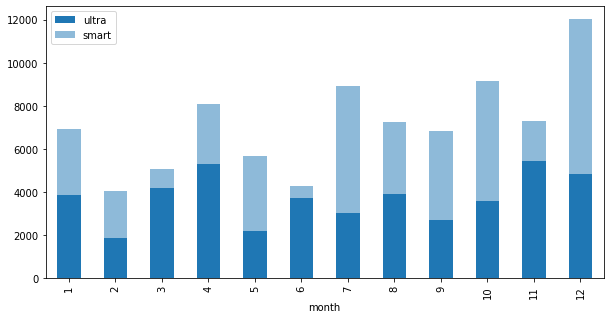

In [104]:
ax=tariff_ultra.plot(y='sum_duration',figsize=(10,5),style='o-',kind='bar',label='ultra')
#plt.show()
tariff_smart.plot(y='sum_duration', figsize=(10,5),style='o-',kind='bar',label='smart',alpha=0.5, ax=ax)


<AxesSubplot:xlabel='month'>

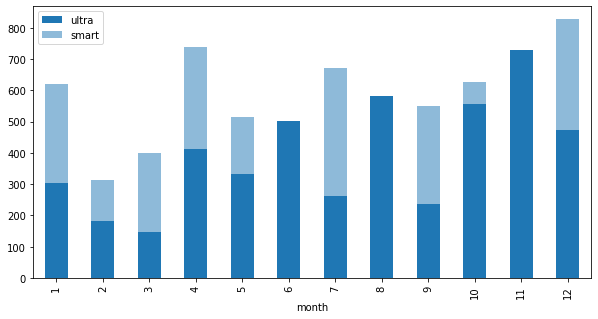

In [105]:
ax=tariff_ultra.plot(y='count_message_date',figsize=(10,5),style='o-',kind='bar',label='ultra')
#plt.show()
tariff_smart.plot(y='count_message_date',figsize=(10,5),style='o-',kind='bar',label='smart',alpha=0.5, ax=ax)

<AxesSubplot:xlabel='month'>

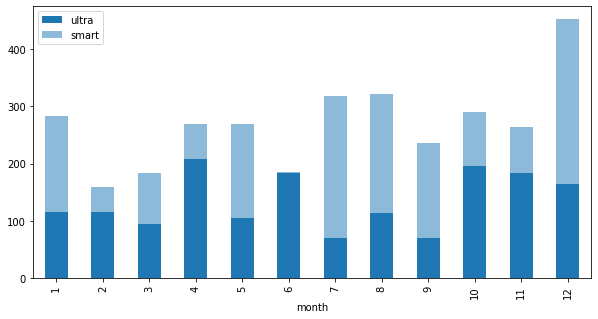

In [106]:
ax=tariff_ultra.plot(y='gb_used',figsize=(10,5),style='o-',kind='bar',label='ultra')
#plt.show()
tariff_smart.plot(y='gb_used',figsize=(10,5),style='o-',kind='bar',label='smart',alpha=0.5, ax=ax)

**Вывод**: Из гистограмм видно, что в общем люди пользующиеся тарифом Smart тратят больше минут, смс, и гб.

### Посчитаем среднее количество, дисперсию и стандартное отклонение.

#### Выделим тариф smart

In [107]:
tariff_smart_group=grouped_all.query('tariff=="smart"') # выделим тариф smart
tariff_smart_group.head()

,user_id,month,sum_duration,count_duration,count_message_date,sum_mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_included,money
0,1005,1,95.0,15.0,7.0,2730.0,Набережные Челны,smart,50,15360,500,550,200,3,3,2.666016,15.0,550.000000
1,1032,1,380.0,61.0,38.0,24147.0,Ульяновск,smart,50,15360,500,550,200,3,3,23.581055,15.0,2266.210938
2,1045,1,9.0,1.0,5.0,2348.0,Улан-Удэ,smart,50,15360,500,550,200,3,3,2.292969,15.0,550.000000
3,1055,1,551.0,64.0,30.0,17111.0,Казань,smart,50,15360,500,550,200,3,3,16.709961,15.0,1044.992188
4,1071,1,194.0,24.0,16.0,15622.0,Омск,smart,50,15360,500,550,200,3,3,15.255859,15.0,601.171875


In [108]:
call_mean_smart=tariff_smart_group['sum_duration'].mean()
print ('Cреднее кол-во звонков по тарифу Smart:',call_mean_smart )  #в тарифе 500 мин разговора

mess_mean_smart = tariff_smart_group['count_message_date'].mean()
print ('Cреднее кол-во сообщений по тарифу Smart:',mess_mean_smart) # в тарифе 50 сообщений

gb_mean_smart = tariff_smart_group['gb_used'].mean()
print ('Cреднее кол-во потраченных гигабайт по тарифу Smart:', gb_mean_smart) # в тарифе 15 Гб

Cреднее кол-во звонков по тарифу Smart: 244.83954154727795
Cреднее кол-во сообщений по тарифу Smart: 23.174657534246574
Cреднее кол-во потраченных гигабайт по тарифу Smart: 9.263036689648997


Видим, что в среднем пользователи тарифа Smart укладываются в отведенный тарифом лимит.

In [109]:
call_var_smart = np.var(tariff_smart_group[['sum_duration']])
print ('Дисперсия кол-во звонков по тарифу Smart:', call_var_smart)

mess_var_smart = np.var(tariff_smart_group[['count_message_date']])
print ('Дисперсия кол-во звонков по тарифу Smart:', mess_var_smart)

gb_var_smart = np.var(tariff_smart_group[['gb_used']])
print ('Дисперсия кол-во звонков по тарифу Smart:', gb_var_smart)

Дисперсия кол-во звонков по тарифу Smart: sum_duration    25839.200614
dtype: float64
Дисперсия кол-во звонков по тарифу Smart: count_message_date    427.651002
dtype: float64
Дисперсия кол-во звонков по тарифу Smart: gb_used    31.804648
dtype: float64


In [110]:
call_sig_smart = call_var_smart**0.5
print ('стандартное отклонение кол-во звонков по тарифу Smart:', call_sig_smart)

mess_sig_smart = mess_var_smart**0.5
print ('стандартное отклонение кол-во звонков по тарифу Smart:', mess_sig_smart)

gb_sig_smart = gb_var_smart**0.5
print ('стандартное отклонение кол-во звонков по тарифу Smart:', gb_sig_smart)

стандартное отклонение кол-во звонков по тарифу Smart: sum_duration    160.745764
dtype: float64
стандартное отклонение кол-во звонков по тарифу Smart: count_message_date    20.679724
dtype: float64
стандартное отклонение кол-во звонков по тарифу Smart: gb_used    5.639561
dtype: float64


<AxesSubplot:>

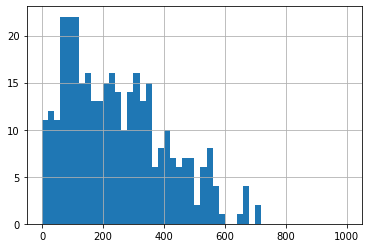

In [111]:
tariff_smart_group['sum_duration'].hist(bins=50, range =(0,1000))

<AxesSubplot:>

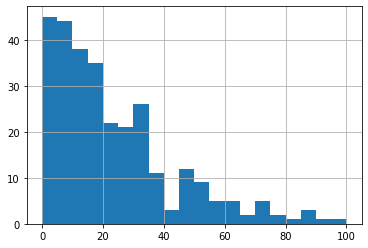

In [112]:
tariff_smart_group['count_message_date'].hist(bins=20, range =(0,100))

<AxesSubplot:>

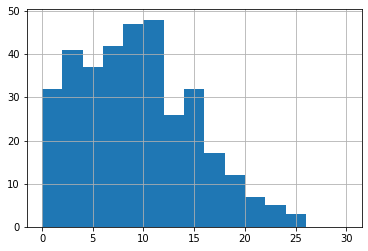

In [113]:
tariff_smart_group['gb_used'].hist(bins=15, range =(0,30))

**Вывод**:

Видно, что по всем показателям в основном абоненты тарифа Smart предпочитают не выходить за рамки предоставленных минут, смс и интернета. Но есть те которым не хватает предоставленных лимитов. Возможно именно с этими абонентами есть смысл связаться нашим менеджерам и предложить им более продвинутый тариф.

#### Выделим тариф ultra

In [114]:
tariff_ultra_group=grouped_all.query('tariff=="ultra"') # выделим тариф ultra
tariff_ultra_group

,user_id,month,sum_duration,count_duration,count_message_date,sum_mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_included,money
350,1120,1,55.0,5.0,NaN,657.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.641602,30.0,1950.0
351,1126,1,272.0,35.0,4.0,16377.0,Санкт-Петербург,ultra,1000,30720,3000,1950,150,1,1,15.993164,30.0,1950.0
352,1168,1,277.0,38.0,14.0,8161.0,Кострома,ultra,1000,30720,3000,1950,150,1,1,7.969727,30.0,1950.0
353,1254,1,466.0,59.0,NaN,19707.0,Москва,ultra,1000,30720,3000,1950,150,1,1,19.245117,30.0,1950.0
354,1375,1,852.0,126.0,75.0,14563.0,Пенза,ultra,1000,30720,3000,1950,150,1,1,14.221680,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1091,5,NaN,NaN,30.0,10714.0,Набережные Челны,ultra,1000,30720,3000,1950,150,1,1,10.462891,30.0,1950.0
494,1231,5,NaN,NaN,55.0,10868.0,Чебоксары,ultra,1000,30720,3000,1950,150,1,1,10.613281,30.0,1950.0
495,1473,8,NaN,NaN,17.0,12917.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,12.614258,30.0,1950.0
496,1328,10,NaN,NaN,6.0,22447.0,Мурманск,ultra,1000,30720,3000,1950,150,1,1,21.920898,30.0,1950.0


In [115]:
call_mean_ultra=tariff_ultra_group['sum_duration'].mean()
print ('Cреднее кол-во звонков по тарифу Smart:',call_mean_ultra )  #в тарифе 3000 мин разговора

mess_mean_ultra = tariff_ultra_group['count_message_date'].mean()
print ('Cреднее кол-во сообщений по тарифу Smart:',mess_mean_ultra) # в тарифе 1000 сообщений

gb_mean_ultra = tariff_ultra_group['gb_used'].mean()
print ('Cреднее кол-во потраченных гигабайт по тарифу Smart:', gb_mean_ultra) # в тарифе 30 Гб

Cреднее кол-во звонков по тарифу Smart: 313.92957746478874
Cреднее кол-во сообщений по тарифу Smart: 38.97520661157025
Cреднее кол-во потраченных гигабайт по тарифу Smart: 11.158573545258621


In [116]:
call_var_ultra = np.var(tariff_ultra_group[['sum_duration']])
print ('Дисперсия кол-во звонков по тарифу Smart:', call_var_smart)

mess_var_ultra = np.var(tariff_ultra_group[['count_message_date']])
print ('Дисперсия кол-во звонков по тарифу Smart:', mess_var_smart)

gb_var_ultra = np.var(tariff_ultra_group[['gb_used']])
print ('Дисперсия кол-во звонков по тарифу Smart:', gb_var_smart)

Дисперсия кол-во звонков по тарифу Smart: sum_duration    25839.200614
dtype: float64
Дисперсия кол-во звонков по тарифу Smart: count_message_date    427.651002
dtype: float64
Дисперсия кол-во звонков по тарифу Smart: gb_used    31.804648
dtype: float64


In [117]:
call_sig_ultra = np.sqrt(call_var_ultra)
print ('стандартное отклонение кол-во звонков по тарифу Smart:', call_sig_smart)

mess_sig_ultra = np.sqrt(mess_var_ultra)
print ('стандартное отклонение кол-во звонков по тарифу Smart:', mess_sig_smart)

gb_sig_ultra = np.sqrt(gb_var_ultra)
print ('стандартное отклонение кол-во звонков по тарифу Smart:', gb_sig_smart)

стандартное отклонение кол-во звонков по тарифу Smart: sum_duration    160.745764
dtype: float64
стандартное отклонение кол-во звонков по тарифу Smart: count_message_date    20.679724
dtype: float64
стандартное отклонение кол-во звонков по тарифу Smart: gb_used    5.639561
dtype: float64


<AxesSubplot:>

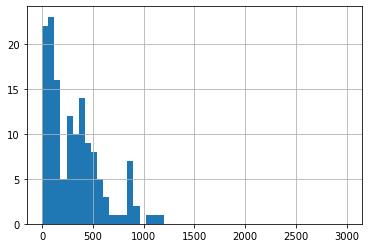

In [118]:
tariff_ultra_group['sum_duration'].hist(bins=50, range =(0,3000))

<AxesSubplot:>

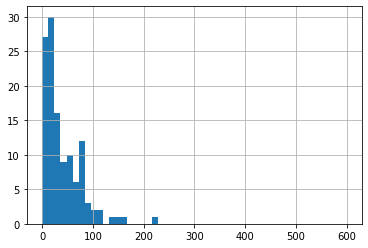

In [119]:
tariff_ultra_group['count_message_date'].hist(bins=50, range =(0,600))

<AxesSubplot:>

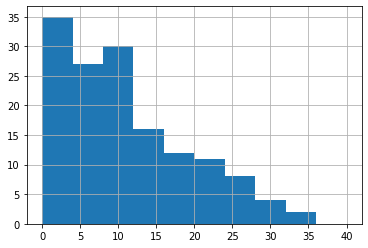

In [120]:
tariff_ultra_group['gb_used'].hist(bins=10, range =(0,40))

**Вывод**: 

Видно, что абонеты тарифа Ultra по кол-воам минут разговра и смс сообщений никогда не выходят за рамки предоставленных тарифом лимитов. При этом некоторым абонентам иногда не хвататет предоставленного интернета. Думаю если добавить по этому тарифу несколько гигабайт интернета и убавить смс ,то это будет весовым конкурентым преимуществом для наших абонетов, чтобы они не ушли к другим.

## Проверим гипотизы

### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт».

<div style="border:solid blue 2px; padding: 20px"> 
    
Считаем нулевую гипотизу, что средняя выручка от ползователей тарифов «Ультра» и «Смарт» равны. Алтернативная теория, что средние тарифов не равны.

Проверим равны ли дисперсии.

In [121]:
np.var(tariff_smart_group['money'])

141774.772988628

In [122]:
np.var(tariff_ultra_group['money'])

4144.227640897884

дисперсии не равны, значит прими equal_var=False (до этого было True)

In [123]:
results=st.ttest_ind(tariff_smart_group['money'],tariff_ultra_group['money'],equal_var=False ) 
alpha = .05 # критический уровень статистической значимости
results.pvalue

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')


Отвергаем нулевую гипотезу


**Вывод**:

Мы отвергли нулевую гипотизу и приняли альтернативную гиипотизу, что среднее тарифов не равны. 


In [124]:
#alpha = .05 # критический уровень статистической значимости

In [125]:
#interested_value=tariff_ultra_group['money'].mean() # среднее значение потраченных денег для тарифа ultra

In [126]:
#results = st.ttest_1samp(tariff_smart_group['money'], interested_value)
 
#results.pvalue/2


In [128]:
#if (results.pvalue/2 < alpha) and (tariff_smart_group['money'].mean() > interested_value):
  #  print('Отвергаем нулевую гипотезу')
#else:
   # print('Не получилось отвергнуть нулевую гипотезу')


Наша гипотиза подтвердилась. Выручка от тарифа "Смарт" больше чем выручка тарифа "Ультра".

### Проверим гипотизу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.



In [ ]:
moscow_city=grouped_all.query('city=="Москва"')

In [ ]:
other_city=grouped_all.query('city!="Москва"')

In [ ]:
results=st.ttest_ind(moscow_city['money'], other_city['money'],equal_var=True) 
results.pvalue

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

**Вывод**:
    
В столице нашей Родины денег на тарифы трятят больше чем в остальных городах, это связана с уровнем дохода и с кол-вом проживающих абонентов. Все логично.


**Общий вывод**:
    
В ходе исследованмя мы выяснли, что люди используют тариф  Смарт тратят больше минут, смс и гигабайт. При этом часть абоненов  тарифа смарт выходят за рамки предоставленных тарифом лимитов. Абоненты тарифа Ультра  по кол-ву минут разговра и смс сообщений никогда не выходят за рамки предоставленных тарифом лимитов. При этом некоторым абонентам иногда не хвататет предоставленного интернета.

Выручка тарифа Смарт  больше чем выручка тарифа Ультра.

В Москве денег на связь трятят больше чем в остальных городах, это связана с уровнем дохода и с кол-вом проживающих абонентов. 

    
    